In [1]:
# importing Required Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
# importing Data
df = pd.read_csv(r"C:\Users\chroh\Downloads\Customer_Churn_Analysis_2023.csv")

In [4]:
# Understanding data structure
df.head()

,Customer ID,Gender,Customer Age,Region,Date,Most_Frequent_Category,Avg_Product_Price,Purchase_Frequency,Life_Time_Value,Payment Method,Payment_Failure_Probability,Payment_Sucess_Probability,Product_Return_Probability,IsActiveMember,Churn_Probability,Churn,Retention_Strategy
0,23891,Female,26,Africa,2023-04-13 08:45:00,Automotive,352,3,511,Cash,0.20,0.80,0.98,0,0.558257,0,Loyalty Programs
1,20177,Female,70,Asia,2023-02-03 00:50:00,Toys,103,1,1752,Cash,0.97,0.03,0.13,1,0.671252,0,Discounts
2,5961,Male,30,North America,2023-08-07 00:19:00,Electronics,228,5,391,Credit Card,0.84,0.16,0.76,1,0.418272,0,Loyalty Programs
3,36327,Male,31,Africa,2023-07-28 12:51:00,Books,393,2,1575,Credit Card,0.08,0.92,0.90,1,0.460585,0,Loyalty Programs
4,27304,Male,51,Europe,2023-08-22 16:43:00,Home & Kitchen,136,5,4538,PayPal,0.98,0.02,0.98,0,0.805234,0,Loyalty Programs


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47687 entries, 0 to 47686
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Customer ID                  47687 non-null  int64  
 1   Gender                       47687 non-null  object 
 2   Customer Age                 47687 non-null  int64  
 3   Region                       47687 non-null  object 
 4   Date                         47687 non-null  object 
 5   Most_Frequent_Category       47687 non-null  object 
 6   Avg_Product_Price            47687 non-null  int64  
 7   Purchase_Frequency           47687 non-null  int64  
 8   Life_Time_Value              47687 non-null  int64  
 9   Payment Method               47687 non-null  object 
 10  Payment_Failure_Probability  47687 non-null  float64
 11  Payment_Sucess_Probability   47687 non-null  float64
 12  Product_Return_Probability   47687 non-null  float64
 13  IsActiveMember  

In [9]:
df.columns

Index(['Customer ID', 'Gender', 'Customer Age', 'Region', 'Date',
       'Most_Frequent_Category', 'Avg_Product_Price', 'Purchase_Frequency',
       'Life_Time_Value', 'Payment Method', 'Payment_Failure_Probability',
       'Payment_Sucess_Probability', 'Product_Return_Probability',
       'IsActiveMember', 'Churn_Probability', 'Churn', 'Retention_Strategy'],
      dtype='object')

In [11]:
df.describe()

,Customer ID,Customer Age,Avg_Product_Price,Purchase_Frequency,Life_Time_Value,Payment_Failure_Probability,Payment_Sucess_Probability,Product_Return_Probability,IsActiveMember,Churn_Probability,Churn
count,47687.000000,47687.000000,47687.000000,47687.000000,47687.000000,47687.000000,47687.000000,47687.000000,47687.000000,47687.000000,47687.000000
mean,24971.661375,43.911213,255.352591,3.002789,2732.350620,0.498563,0.501437,0.499932,0.970202,0.500967,0.201292
std,14389.526032,15.372536,141.412369,1.411799,1444.057311,0.288623,0.288623,0.288692,0.170033,0.288385,0.400970
min,1.000000,18.000000,10.000000,1.000000,103.000000,0.000000,0.000000,0.000000,0.000000,0.000007,0.000000
25%,12552.000000,30.000000,133.000000,2.000000,1482.000000,0.250000,0.250000,0.250000,1.000000,0.251649,0.000000
50%,25029.000000,44.000000,256.000000,3.000000,2730.000000,0.500000,0.500000,0.500000,1.000000,0.500256,0.000000
75%,37472.500000,57.000000,378.000000,4.000000,3983.000000,0.750000,0.750000,0.750000,1.000000,0.749593,0.000000
max,50000.000000,70.000000,500.000000,5.000000,5350.000000,1.000000,1.000000,1.000000,1.000000,0.999987,1.000000


In [13]:
# checking null values
df.isnull().sum()

Customer ID                    0
Gender                         0
Customer Age                   0
Region                         0
Date                           0
Most_Frequent_Category         0
Avg_Product_Price              0
Purchase_Frequency             0
Life_Time_Value                0
Payment Method                 0
Payment_Failure_Probability    0
Payment_Sucess_Probability     0
Product_Return_Probability     0
IsActiveMember                 0
Churn_Probability              0
Churn                          0
Retention_Strategy             0
dtype: int64

In [15]:
#checking duplicate values
df.duplicated().sum()

0

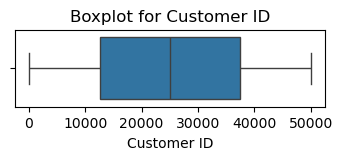

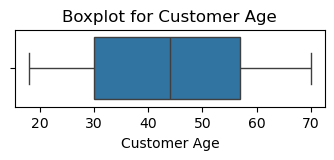

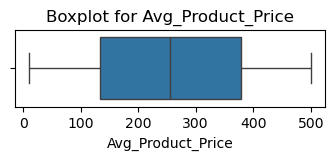

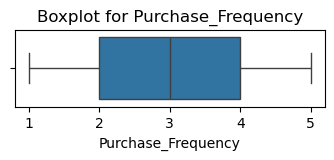

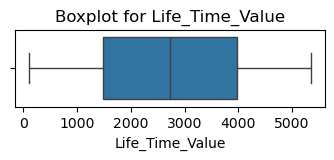

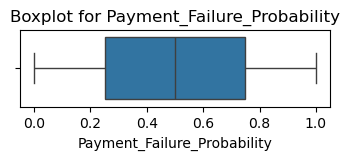

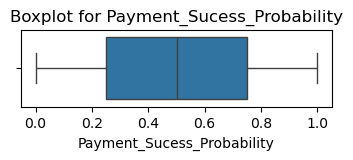

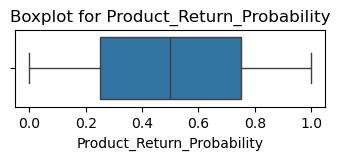

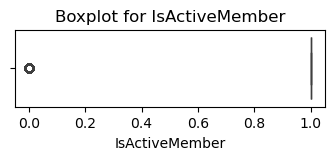

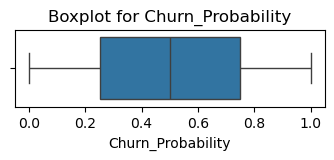

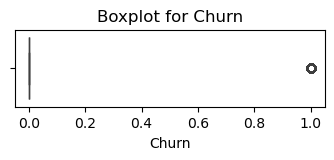

In [19]:
# checking for outliers
numeric_cols = df.select_dtypes(include='number').columns

for col in numeric_cols:
    plt.figure(figsize=(4, 1))
    sns.boxplot(data=df, x=col)
    plt.title(f'Boxplot for {col}')
    plt.show()


<Axes: >

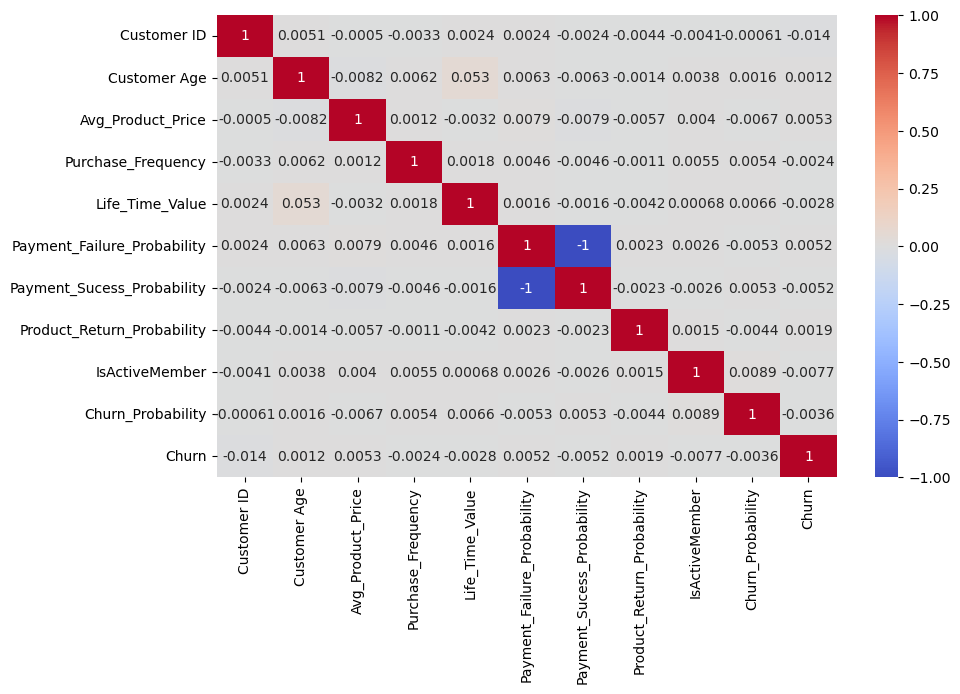

In [75]:
#correlation through heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')


In [23]:
# Assume 'Churn' column: 1 = churned, 0 = not churned

churn_rate = df['Churn'].mean() * 100

print(f"Overall Churn Rate: {churn_rate:.2f}%")

Overall Churn Rate: 20.13%


Total Customers         : 47687
Churned Customers       : 9599
Overall Churn Rate      : 20.13%


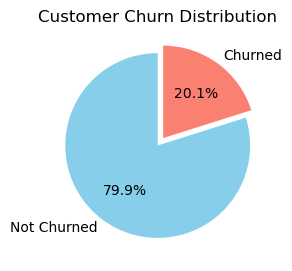

In [25]:
# 1. Total number of customers
total_customers = len(df)
# 2. Total number of churned customers
churned_customers = df['Churn'].sum()  # since 1 = churn
# 3. Churn Rate
churn_rate = (churned_customers / total_customers) * 100
# output
print(f"Total Customers         : {total_customers}")
print(f"Churned Customers       : {churned_customers}")
print(f"Overall Churn Rate      : {churn_rate:.2f}%")

# Plot Pie Chart
churn_counts = df['Churn'].value_counts()

plt.figure(figsize=(3,3))
plt.pie(
    churn_counts,
    labels=['Not Churned', 'Churned'],
    autopct='%1.1f%%',
    startangle=90,
    colors=['skyblue', 'salmon'],
    explode=(0, 0.1)
)
plt.title('Customer Churn Distribution')
plt.show()


Churn status by Gender:
   Gender  Churn   Count
0  Female      0  100920
1  Female      1   24640
2    Male      0   99206
3    Male      1   25234

Meaning of Churn column:
0 = Not Churned, 1 = Churned


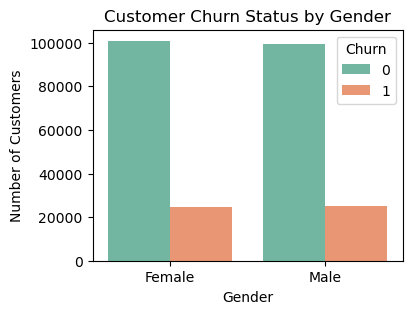

In [69]:
# churn rate by gender
# Group data by Gender and Churn
gender_churn = df.groupby(['Gender', 'Churn']).size().reset_index(name='Count')

# 1. Print the table
print("Churn status by Gender:")
print(gender_churn)

print("\nMeaning of Churn column:")
print("0 = Not Churned, 1 = Churned")

# 2. Plot Bar Chart
plt.figure(figsize=(4,3))
sns.barplot(data=gender_churn, x='Gender', y='Count', hue='Churn', palette='Set2')

plt.title('Customer Churn Status by Gender')
plt.ylabel('Number of Customers')
plt.xlabel('Gender')
plt.legend(title='Churn')  # Nice labels
plt.show()


C:\Users\chroh\AppData\Local\Temp\ipykernel_44848\3854753752.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_churn = df.groupby(['Age_Group', 'Churn']).size().reset_index(name='Count')


Customer counts and churn rates by Age Group:

Churn          0     1  Churn Rate (%)
Age_Group                             
<18          783   208           20.99
18-35      12314  3050           19.85
36-55      14207  3603           20.23
56+         7160  1849           20.52


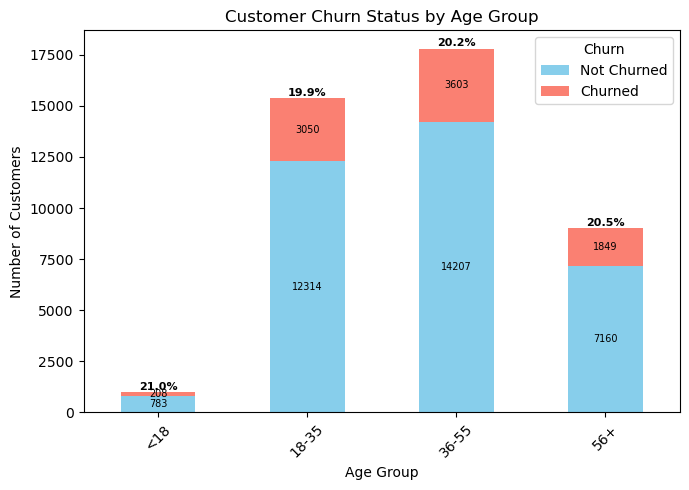

In [27]:
# churn rate by age
# Create Age Groups
bins = [0, 18, 35, 55, 65]
labels = ['<18', '18-35', '36-55', '56+' ]

df['Age_Group'] = pd.cut(df['Customer Age'], bins=bins, labels=labels)

# Group by Age_Group and Churn
age_churn = df.groupby(['Age_Group', 'Churn']).size().reset_index(name='Count')

# Pivot for stacked bar
age_churn_pivot = age_churn.pivot(index='Age_Group', columns='Churn', values='Count').fillna(0)

# Add Churn Rate column
age_churn_pivot['Churn Rate (%)'] = (age_churn_pivot[1] / (age_churn_pivot[0] + age_churn_pivot[1])) * 100

# Round nicely
age_churn_pivot['Churn Rate (%)'] = age_churn_pivot['Churn Rate (%)'].round(2)

# Print nicely
print("Customer counts and churn rates by Age Group:\n")
print(age_churn_pivot)

# Now Plot
ax = age_churn_pivot[[0, 1]].plot(kind='bar', stacked=True, figsize=(7,5), color=['skyblue', 'salmon'])

plt.title('Customer Churn Status by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of Customers')
plt.legend(title='Churn', labels=['Not Churned', 'Churned'])
plt.xticks(rotation=45)
plt.tight_layout()

# Annotate Numbers and Rates
for idx, (not_churned, churned) in enumerate(zip(age_churn_pivot[0], age_churn_pivot[1])):
    total = not_churned + churned
    churn_rate = (churned / total) * 100 if total > 0 else 0

    # Annotate inside the bar
    ax.text(idx, not_churned/2, int(not_churned), ha='center', va='center', color='black', fontsize=7)
    ax.text(idx, not_churned + churned/2, int(churned), ha='center', va='center', color='black', fontsize=7)

    # Annotate churn rate on top
    ax.text(idx, total + 10, f'{churn_rate:.1f}%', ha='center', va='bottom', color='black', fontsize=8, fontweight='bold')

plt.show()


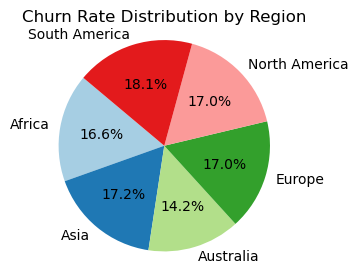

In [29]:
# churn rate by region
# Group by Region and Churn
region_churn = df.groupby(['Region', 'Churn']).size().reset_index(name='Count')

# Pivot for easier handling
region_churn_pivot = region_churn.pivot(index='Region', columns='Churn', values='Count').fillna(0)

# Calculate Churn Rate %
region_churn_pivot['Churn Rate (%)'] = (region_churn_pivot[1] / (region_churn_pivot[0] + region_churn_pivot[1])) * 100

# Only need Churn Rate now
churn_rate_by_region = region_churn_pivot['Churn Rate (%)']

# Plot Pie Chart
plt.figure(figsize=(3,3))
plt.pie(churn_rate_by_region, labels=churn_rate_by_region.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Churn Rate Distribution by Region')
plt.axis('equal')  # Equal aspect ratio ensures pie chart is round
plt.show()


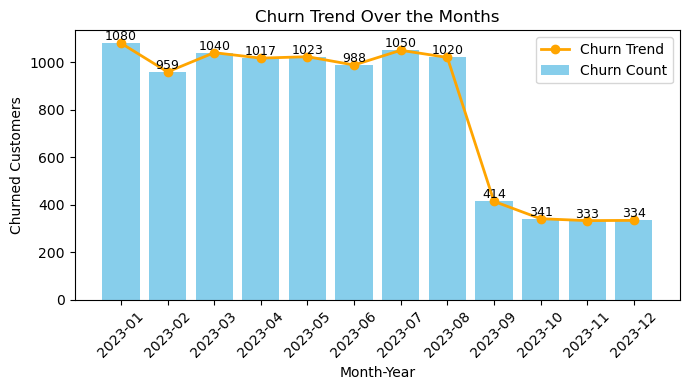

In [31]:
# churn trend over time by month
# Ensure 'Date' is in datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Extracting month and year from 'Date' to group by month
df['Year-Month'] = df['Date'].dt.to_period('M')

# Filter the churned customers (Churn == 1 for churned customers)
churned_data = df[df['Churn'] == 1]

# Grouping by 'Year-Month' and counting the churned customers
churn_trend = churned_data.groupby('Year-Month').size()

# Check if there are churned customers to avoid errors
if churn_trend.empty:
    print("No churned customers found.")
else:
    # Convert 'Year-Month' to a string of month names for better readability
    churn_trend.index = churn_trend.index.astype(str)

    # Plotting the churn trend with bars and line
    plt.figure(figsize=(7,4))

    # Bar plot for churn count per month
    plt.bar(churn_trend.index, churn_trend.values, color='skyblue', label='Churn Count')

    # Line plot for the churn trend
    plt.plot(churn_trend.index, churn_trend.values, color='orange', marker='o', linestyle='-', linewidth=2, markersize=6, label='Churn Trend')

    # Adding values on top of each bar
    for i in range(len(churn_trend)):
        plt.text(i, churn_trend.iloc[i] + 0.2, str(churn_trend.iloc[i]), ha='center', va='bottom', fontsize=9)

    # Adding labels and title
    plt.xlabel('Month-Year', fontsize=10)
    plt.ylabel('Churned Customers', fontsize=10)
    plt.title('Churn Trend Over the Months', fontsize=12)

    # Rotate x-axis labels for better readability
    plt.xticks(rotation=45)

    # Adding legend
    plt.legend()

    plt.tight_layout()
    plt.show()


C:\Users\chroh\AppData\Local\Temp\ipykernel_44848\1857433728.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=churn_by_category.values, y=churn_by_category.index, palette='rocket')


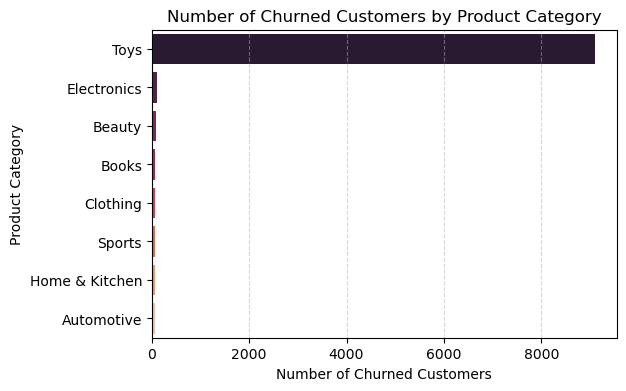

In [53]:
# Filter only churned customers
churned_df = df[df['Churn'] == 1]

# Count churned customers by product category
churn_by_category = churned_df['Most_Frequent_Category'].value_counts()

# Visualize
plt.figure(figsize=(6,4))
sns.barplot(x=churn_by_category.values, y=churn_by_category.index, palette='rocket')
plt.title('Number of Churned Customers by Product Category')
plt.xlabel('Number of Churned Customers')
plt.ylabel('Product Category')
plt.grid(True, axis='x', linestyle='--', alpha=0.5)
plt.show()


📊 Payment Failure Probability stats (for churned customers):
count    9599.000000
mean        0.501572
std         0.287943
min         0.000000
25%         0.250000
50%         0.500000
75%         0.750000
max         1.000000
Name: Payment_Failure_Probability, dtype: float64

 Total churned customers: 9599
⚠ Churned customers with Payment Failure Probability > 0.5: 4786


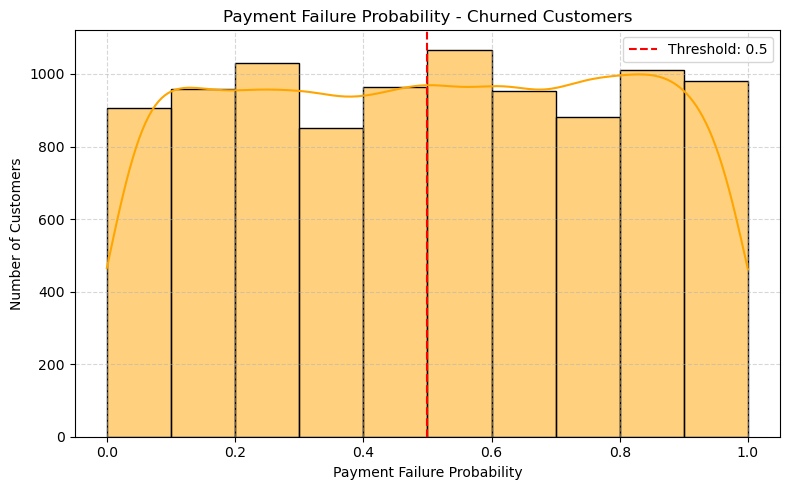

In [73]:


# Step 1: Filter churned customers
churned_df = df[df['Churn'] == 1]

# Step 2: Describe Payment Failure Probability for churned customers
print("📊 Payment Failure Probability stats (for churned customers):")
print(churned_df['Payment_Failure_Probability'].describe())

# Step 3: Count churned customers with Payment Failure Probability > 0.5
high_risk_churn = churned_df[churned_df['Payment_Failure_Probability'] > 0.5]

print(f"\n Total churned customers: {len(churned_df)}")
print(f"⚠ Churned customers with Payment Failure Probability > 0.5: {len(high_risk_churn)}")

# Step 5: Visualize the distribution
plt.figure(figsize=(8, 5))
sns.histplot(churned_df['Payment_Failure_Probability'], bins=10, kde=True, color='orange')
plt.axvline(0.5, color='red', linestyle='--', label='Threshold: 0.5')
plt.title('Payment Failure Probability - Churned Customers')
plt.xlabel('Payment Failure Probability')
plt.ylabel('Number of Customers')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


 Churned Customers by Payment Method:
 Payment Method
Credit Card    3903
PayPal         2833
Cash           1909
Crypto          954
Name: count, dtype: int64


C:\Users\chroh\AppData\Local\Temp\ipykernel_44848\2192723347.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=churn_by_payment.index, y=churn_by_payment.values, palette="Set2")


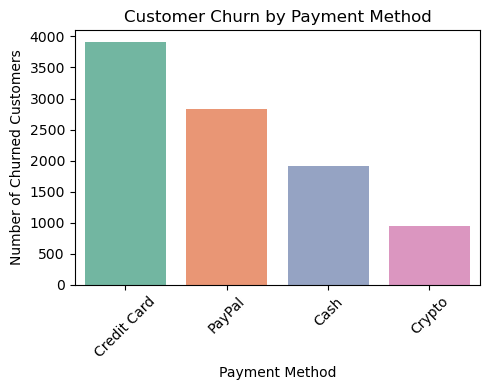

In [63]:
#churn cutomers by payment method
# Count churned customers per payment method
churn_by_payment = df[df['Churn'] == 1]['Payment Method'].value_counts()
print(" Churned Customers by Payment Method:\n", churn_by_payment)
plt.figure(figsize=(5, 4))
sns.barplot(x=churn_by_payment.index, y=churn_by_payment.values, palette="Set2")
plt.title("Customer Churn by Payment Method")
plt.xlabel("Payment Method")
plt.ylabel("Number of Churned Customers")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


 Churned Customers by Active Status:
 IsActiveMember
Active Member      9288
Inactive Member     311
Name: count, dtype: int64


C:\Users\chroh\AppData\Local\Temp\ipykernel_44848\1876125777.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=churn_by_active.index, y=churn_by_active.values, palette="Set1")


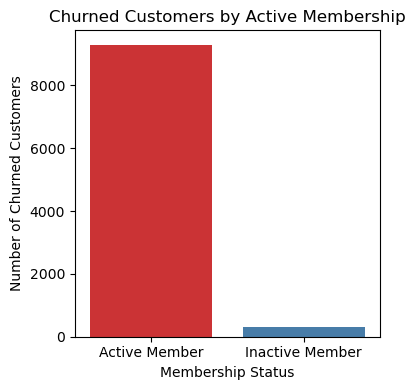

In [83]:
# churn customer by customer active status:
# Count churned customers based on IsActiveMember
churn_by_active = df[df['Churn'] == 1]['IsActiveMember'].value_counts()
churn_by_active.index = churn_by_active.index.map({1: 'Active Member', 0: 'Inactive Member'})
print(" Churned Customers by Active Status:\n", churn_by_active)
# Plot
plt.figure(figsize=(4, 4))
sns.barplot(x=churn_by_active.index, y=churn_by_active.values, palette="Set1")
plt.title("Churned Customers by Active Membership")
plt.xlabel("Membership Status")
plt.ylabel("Number of Churned Customers")
plt.tight_layout()
plt.show()


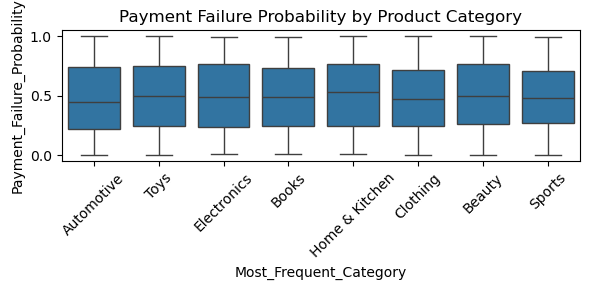

In [109]:
# correlation of Product category with all variables
# Boxplot: Product Category vs Payment Failure Probability
plt.figure(figsize=(6, 3))
sns.boxplot(x='Most_Frequent_Category', y='Payment_Failure_Probability', data=df)
plt.title('Payment Failure Probability by Product Category')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

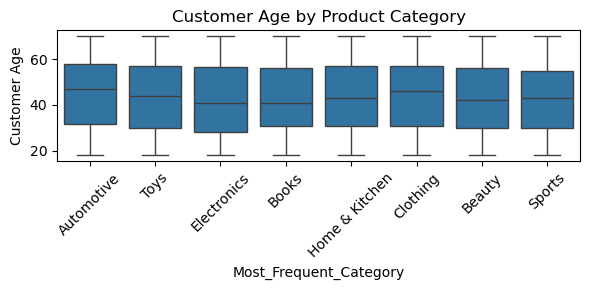

In [111]:
# Boxplot: Product Category vs Customer Age
plt.figure(figsize=(6, 3))
sns.boxplot(x='Most_Frequent_Category', y='Customer Age', data=df)
plt.title('Customer Age by Product Category')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


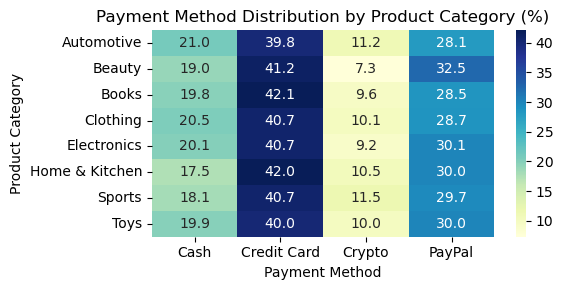

In [113]:
# Cross-tab: Product Category vs Payment Method
pm_ct = pd.crosstab(df['Most_Frequent_Category'], df['Payment Method'], normalize='index') * 100

plt.figure(figsize=(6, 3))
sns.heatmap(pm_ct, annot=True, fmt=".1f", cmap="YlGnBu")
plt.title("Payment Method Distribution by Product Category (%)")
plt.ylabel("Product Category")
plt.xlabel("Payment Method")
plt.tight_layout()
plt.show()



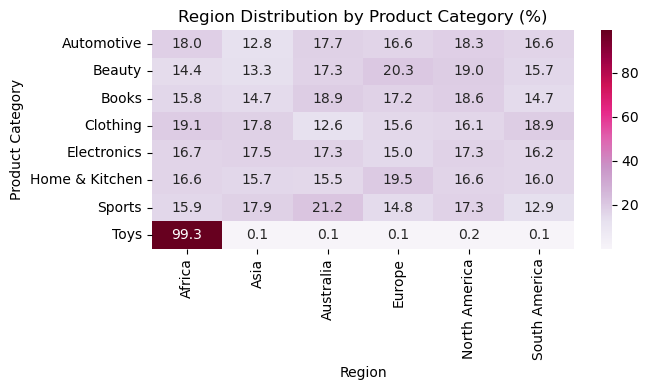

In [115]:
# Cross-tab: Product Category vs Region
region_ct = pd.crosstab(df['Most_Frequent_Category'], df['Region'], normalize='index') * 100

plt.figure(figsize=(7, 4))
sns.heatmap(region_ct, annot=True, fmt=".1f", cmap="PuRd")
plt.title("Region Distribution by Product Category (%)")
plt.ylabel("Product Category")
plt.xlabel("Region")
plt.tight_layout()
plt.show()



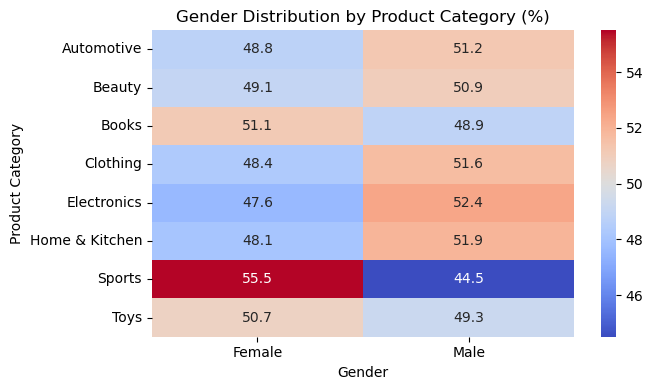

In [117]:
# Cross-tab: Product Category vs Gender
gender_ct = pd.crosstab(df['Most_Frequent_Category'], df['Gender'], normalize='index') * 100

plt.figure(figsize=(7, 4))
sns.heatmap(gender_ct, annot=True, fmt=".1f", cmap="coolwarm")
plt.title("Gender Distribution by Product Category (%)")
plt.ylabel("Product Category")
plt.xlabel("Gender")
plt.tight_layout()
plt.show()

In [119]:
# Churned Customers' Lifetime Value by Product Category
# Filter churned customers
churned_df = df[df['Churn'] == 1]

# Calculate average Lifetime Value by Product Category
ltv_by_category = churned_df.groupby('Most_Frequent_Category')['Life_Time_Value'].sum().sort_values(ascending=False)

print(" Average Lifetime Value of Churned Customers by Product Category:\n")
print(ltv_by_category)

 Average Lifetime Value of Churned Customers by Product Category:

Most_Frequent_Category
Toys              24777268
Electronics         271515
Beauty              220768
Books               201804
Clothing            188760
Sports              184553
Home & Kitchen      153402
Automotive          153230
Name: Life_Time_Value, dtype: int64


In [107]:
# Total Lifetime Value: Churn vs Not Churn
# Group by Churn and sum the lifetime value
ltv_comparison = df.groupby('Churn')['Life_Time_Value'].sum()

# Rename index for better readability
ltv_comparison.index = ['Not Churned', 'Churned']

# Display the result
print(" Total Lifetime Value - Churned vs Not Churned:\n")
print(ltv_comparison)

 Total Lifetime Value - Churned vs Not Churned:

Not Churned    104146304
Churned         26151300
Name: Life_Time_Value, dtype: int64
